# Partial Dependence Plot (PDP) Demonstration

This notebook demonstrates how to compute and interpret ICE plots using scikit-learn. ICE plots help elucidate the effect of input features on individual observation outcomes of a trained machine learning model. I also use this notebook to demonstrate the difference in information provided by PDPs and ICE plots

We'll use the California Housing dataset and a Random Forest Regressor model for the regression. 

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ICE/PDP tools
from sklearn.inspection import PartialDependenceDisplay

# settings
sns.set(style = "whitegrid")

## Load and Explore the Data

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns = data.feature_names)
y = data.target

X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# basic info
X.info()
X.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Train a Random Forest Regressor

In [4]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# train model
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

# evaluate model
print(f"Train R²: {model.score(X_train, y_train):.2f}")
print(f"Test R²: {model.score(X_test, y_test):.2f}")

Train R²: 0.97
Test R²: 0.81


## ICE Analysis of a Single Feature

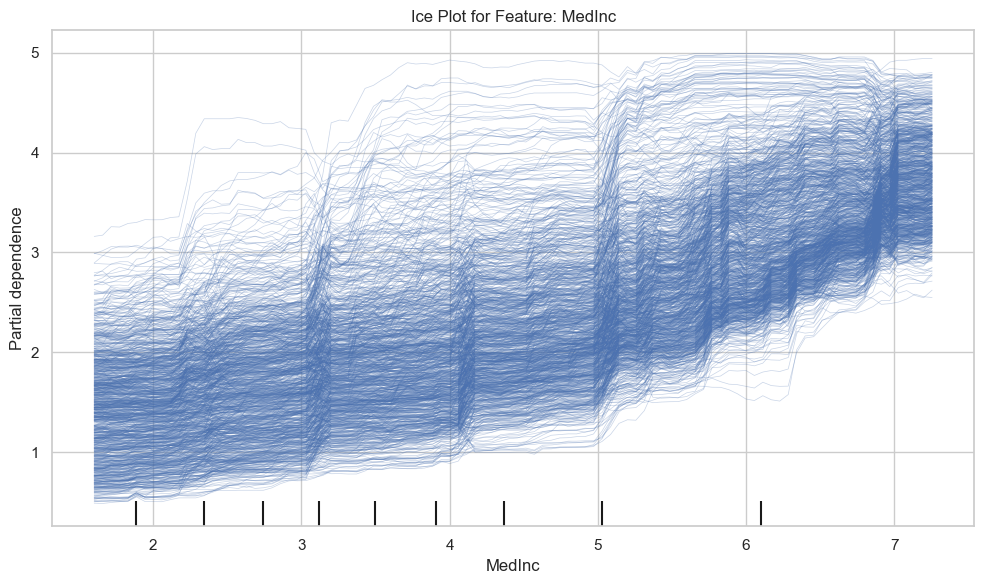

In [9]:
# We'll use ICE plots to visualize how MedInc (median income) affects model predictions
feature = "MedInc"

# ICE plot (kind = "individual" for ICE, "average" for PDP)
fig, ax = plt.subplots(figsize = (10, 6))
PartialDependenceDisplay.from_estimator(
    model, 
    X=X_test,
    features=[feature],
    kind="individual", # ICE
    ax=ax
)

ax.set_title(f"Ice Plot for Feature: {feature}")
plt.tight_layout()
plt.show()

## Compare with PDP

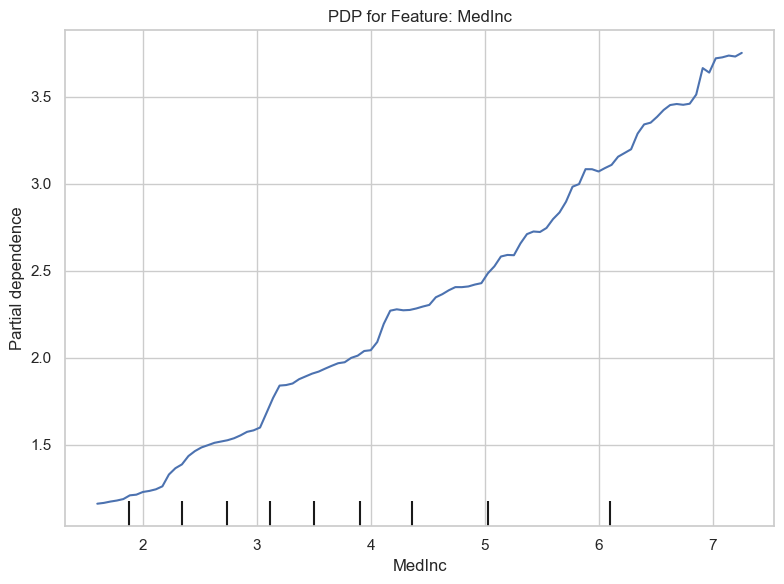

In [10]:
# Plot PDP for comparison
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X=X_test,
    features=[feature],
    kind="average",  # PDP
    ax=ax
)
ax.set_title(f'PDP for Feature: {feature}')
plt.tight_layout()
plt.show()

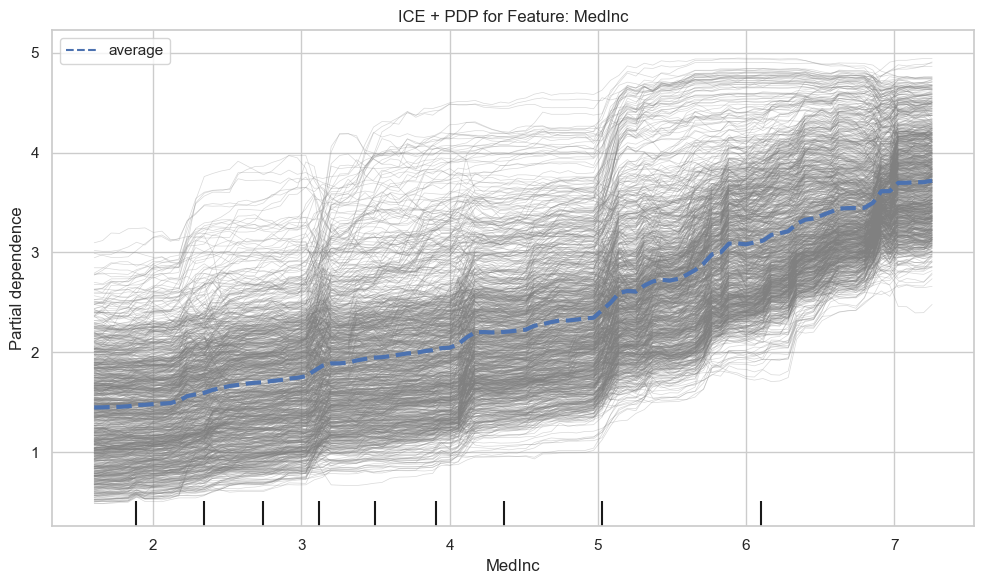

In [33]:
# Plot PDP for comparison
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(
    model,
    X=X_test,
    features=[feature],
    kind="both",  
    ax=ax
)

ax = display.axes_[0, 0]
lines = ax.get_lines()
ice_lines = lines[:-1]
pdp_line = lines[-1]

for line in ice_lines:
    line.set_color("gray")
pdp_line.set_linewidth(3)


ax.set_title(f'ICE + PDP for Feature: {feature}')
plt.tight_layout()
plt.show()

## Interpretation

The above plots depict the individual prediction trajectories for different values of `MedInc`, with each line representing a different observation. We can see that while most lines trend upward, indicating that higher median income in an area generally leads to higher predicted home values, there is noticable variation in slope and shape across individual cases. This suggests that the effect of income is not uniform across all samples, a nuance that is averaged out in the PDP. 